<a href="https://colab.research.google.com/github/shivampip/stock-price-prediction/blob/master/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Google Stock Price Prediction

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Collecting data

In [2]:
! git clone https://www.github.com/shivampip/stock-price-prediction

Cloning into 'stock-price-prediction'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 1), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [0]:
! mv ./stock-price-prediction/*.csv .

In [4]:
! ls

Google_Stock_Price_Test.csv   sample_data
Google_Stock_Price_Train.csv  stock-price-prediction


#### Data Preprocessing

In [0]:
ds_train= pd.read_csv("Google_Stock_Price_Train.csv")

In [6]:
ds_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [0]:
ds_train_open= ds_train.iloc[:, 1:2].values

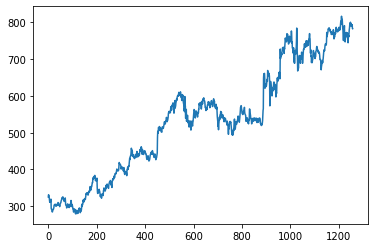

In [8]:
plt.plot(ds_train_open)

#### Feature Scaling

In [0]:
from sklearn.preprocessing import MinMaxScaler
mms= MinMaxScaler(feature_range= (0, 1))

In [0]:
train_scaled= mms.fit_transform(ds_train_open)

In [11]:
train_scaled[:5]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225]])

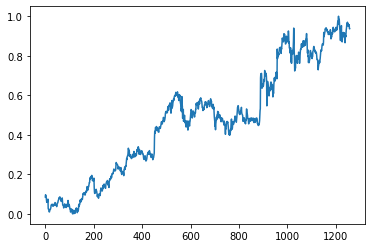

In [12]:
plt.plot(train_scaled)

#### Creating dataset with 60 timesteps

In [0]:
NUM_TIMESTEPS= 60
X_train= []
y_train= []

In [0]:
for i in range(0, len(train_scaled)- NUM_TIMESTEPS):
    X_train.append(train_scaled[i: i+NUM_TIMESTEPS, 0])
    y_train.append(train_scaled[i+NUM_TIMESTEPS, 0])

In [0]:
X_train, y_train= np.array(X_train), np.array(y_train)

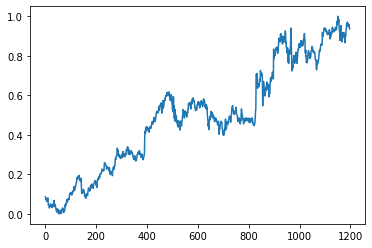

In [16]:
plt.plot(y_train)

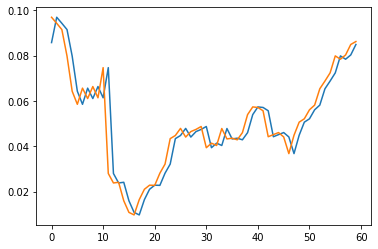

In [17]:
plt.plot(X_train[0])
plt.plot(X_train[1])

In [18]:
X_train.shape

(1198, 60)

In [0]:
X_train= np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [20]:
X_train.shape

(1198, 60, 1)

### Model Building

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
rnn= Sequential()

In [0]:
rnn.add(LSTM(units= 50, return_sequences= True, input_shape= (X_train.shape[1], 1)))
rnn.add(Dropout(0.2))

In [0]:
rnn.add(LSTM(units= 50, return_sequences= True))
rnn.add(Dropout(0.2))

In [0]:
rnn.add(LSTM(units= 50))
rnn.add(Dropout(0.2))

In [0]:
rnn.add(Dense(units=1))

In [33]:
rnn.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [35]:
rnn.fit(X_train, y_train, epochs= 100, batch_size= 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1198/1198 [==============================] - 22s 18ms/step - loss: 0.0415
Epoch 2/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0053
Epoch 3/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0043
Epoch 6/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0041
Epoch 7/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0040
Epoch 8/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0039
Epoch 9/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0036
Epoch 10/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0040
Epoch 11/100
1198/1198 [=============

In [0]:
rnn.save("stock_predictor_model")

In [43]:
import tensorflow as tf
rnn= tf.keras.models.load_model("stock_predictor_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Prediction Time :)

In [0]:
ds_test= pd.read_csv("Google_Stock_Price_Test.csv")

In [0]:
real_stock_price= ds_test.iloc[:, 1:2].values

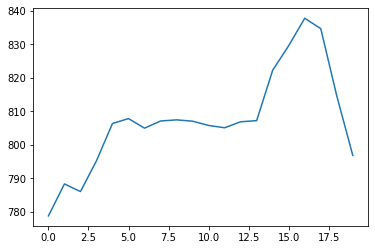

In [38]:
plt.plot(real_stock_price)